<a href="https://colab.research.google.com/github/KCLaurelie/NN-course/blob/master/FINAL_Neural_Networks_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# SWICH RUNTIME TO GPU


import numpy as np
import sklearn.metrics

# For ploting 
import matplotlib.pyplot as plt
import seaborn as sns

# Get torch stuff
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

np.random.seed(42)

# **Neurons are the basic building blocks of Neural Networks**

Usually a neural network has thousands or millions of neurons, but let's for now work with a network that has only one.

<img src="https://drive.google.com/uc?export=view&id=1NEd7WQrLTUzAPz44t6bUEma02LH4GOT3" height='250px' />

$
x_1 - \text{Input} \\
ŷ_1 - \text{Output} \\
$

$
z_1 = w_1 \cdot x_1 + b_1 \\
w_1 - \text{Weight for the first input} \\
b_1 - \text{Bias term for this neuron} \\
z_1 - \text{The linear combination of the inputs and weights + bias} \\
$

$
\theta = \{w, b\} \\
\theta - \text{Parameters of the model/network} \\
$

$
ŷ_1 = f(z_1) \\
f - \text{The activation function} \\
$




# **Activation functions**

Linear:

$f(z) = z$

---
Step:

$f(z) = \begin{cases}
    1,& \text{if } z > 0\\
    0,              & z \le 0
\end{cases}$

---
Sigmoid:

$f(z) = \frac{1}{1 + e^{-z}}$

---
tanh:

$f(z) = tanh(z) = \frac{1 - e^{-z}}{1 + e^{-z}}$

---
ReLU:

$f(z) = max(0, z)$



In [0]:
def step(z):
  return np.array(z > 0, dtype=np.int32)

def tanh(z):
  return np.tanh(z)

def sigmoid(z):
  return 1 / (1+np.exp(-z))
  

def relu(z):
  return np.maximum(0,z)
  

In [0]:
def plot(z, yh, name):
  plt.grid(True)
  plt.xlabel('z')
  plt.ylabel('ŷ')
  plt.plot(z, yh, label=name, color='b')
  plt.axhline(0, color='orange')
  plt.axvline(0, color='orange')
  plt.legend()
  plt.show()

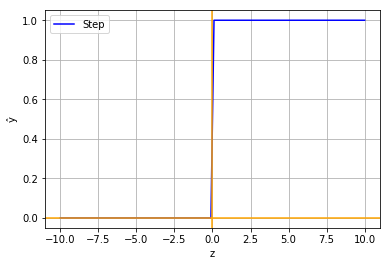

In [0]:
z = np.linspace(-10, 10, 100)

yh = step(z)
plot(z, yh, 'Step')

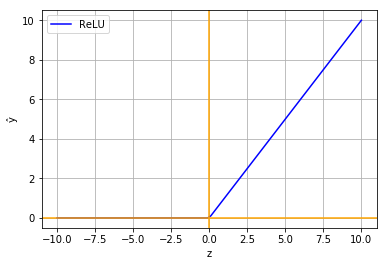

In [0]:
yh = relu(z)
plot(z, yh, 'ReLU')

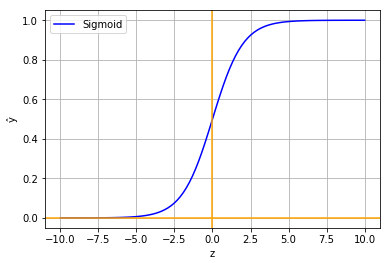

In [0]:
yh = sigmoid(z)
plot(z, yh, 'Sigmoid')

# **An example of an oversimplified problem that can be solved using NN**

Our input is outside temperature which is a value between -30 and 40. We want our NN to predict is it hot or cold outside. This is an example of supervised ML using NN.

Let's encode the output values as:

$
hot   -  1 \\
cold - 0
$

---

$
D = \{\\
(-4, 0), \\
(1, 0),\\
(25, 1),\\
...\}
$

---

In [7]:
# TODO: Generate a vector with 1000 integers with values from -30 to 40
x = np.random.randint(-30,40,1000)
y = np.array([1 if v > 20 else 0 for v in x])
for i in range(10):
  print("If the temperature is {:4} it is  {}".format(x[i], "hot" if y[i] == 1 else "cold"))

If the temperature is  -22 it is  cold
If the temperature is   20 it is  cold
If the temperature is   33 it is  hot
If the temperature is    7 it is  cold
If the temperature is    8 it is  cold
If the temperature is  -16 it is  cold
If the temperature is   14 it is  cold
If the temperature is   37 it is  hot
If the temperature is   35 it is  hot
If the temperature is   25 it is  hot


# Initialize the parameters

<img src="https://drive.google.com/uc?export=view&id=1NEd7WQrLTUzAPz44t6bUEma02LH4GOT3" height='250px' />

The first thing we need to do is initialize the parameters of our NN. In our case we only have two parameters $w_1$ and $b_1$. Usually a random valaue between -1 and 1 is assigned to both. 

In [35]:
#Set seed, so that we always have the same result
np.random.seed(13)

# TODO: Initialize the parameters of the Neural Network
w1 = np.random.uniform(-1,1) # we want a random number between -1 and 1
b1 = np.random.uniform(-1,1)
print(w1,b1)

0.5554048211476403 -0.5249175599301754


$
z_1 = w_1 \cdot x_1 + b_1 \\
ŷ_1 = f(z_1) \\
$

Calculate the outputs, set sigmoid as the activation function.

In [36]:
#TODO 
# Forward pass - get the predictions
z1 = w1*x+b1
yh = sigmoid(z1)
print(z1[0:3])
print()
print(yh[0:3])

[-12.74382363  10.58317886  17.80344154]

[2.92029317e-06 9.99974662e-01 9.99999981e-01]


# Because we are using the sigmod function we can interpret the output as probability

In [0]:
# Decode the outputs hot/cold
yh_temp = ['hot' if val > 0.5 else 'cold' for val in yh]

In [38]:
# Print the first 10 g.t. and predictions
for i in range(10):
  print("If the temperature is {:4} it is  {:4}  vs predicted  {}".format(
      x[i], "hot" if y[i] == 1 else "cold", yh_temp[i]))

If the temperature is  -22 it is  cold  vs predicted  cold
If the temperature is   20 it is  cold  vs predicted  hot
If the temperature is   33 it is  hot   vs predicted  hot
If the temperature is    7 it is  cold  vs predicted  hot
If the temperature is    8 it is  cold  vs predicted  hot
If the temperature is  -16 it is  cold  vs predicted  cold
If the temperature is   14 it is  cold  vs predicted  hot
If the temperature is   37 it is  hot   vs predicted  hot
If the temperature is   35 it is  hot   vs predicted  hot
If the temperature is   25 it is  hot   vs predicted  hot


# Cost function / Loss function / Error function

Cross entropy loss is defined as:

$
L = -\frac{1}{N}\sum_i y_i log(\hat{y}_i) + (1-y_i)log(1-\hat{y}_i) \\
$



$
N - \text{Number of examples in our training set} \\
y_i - \text{The ground truth} \\
\hat{y}_i - \text{The predicted value}\\
$

---
$
y = 1 = hot \\
yh = 0.3 = cold \\
L = -1 \cdot log(0.3) + (1 - 1)log(1-0.3) = -log(0.3) = 1.2 \\
$

$
y = 1 = hot \\
yh = 0.9 = hot \\
L = -1 \cdot log(0.9) + (1 - 1)log(1-0.9) = -log(0.9) = 0.1 \\
$

$
y = 1 = hot \\
yh = 0.01 = cold \\
L = -1 \cdot log(0.01) + (1 - 1)log(1-0.01) = -log(0.01) = 4.6
$

In [39]:
# Calculate the loss
loss = sklearn.metrics.log_loss(y, yh)
print(loss)

1.652041710467049


# **1. Prepare the dataset**

In [40]:
device = torch.device('cpu')

# The whole dataset
print(x[0:10])
print(y[0:10])
print()
# Print the size
print("The size of our dataset is: " + str(x.size))

[-22  20  33   7   8 -16  14  37  35  25]
[0 0 1 0 0 0 0 1 1 1]

The size of our dataset is: 1000




---


**Generate a train/test/dev dataset**

In [0]:
inds = np.random.permutation(len(x))
inds_train = inds[0:int(0.8*len(x))]
inds_test = inds[int(0.8*len(x)):int(0.9*len(x))]
inds_dev = inds[int(0.9*len(x)):]

# 80% of the dataset
x_train = x[inds_train]
y_train = y[inds_train]

# 10% of the dataset
x_test = x[inds_test]
y_test = y[inds_test]

# 10% of the dataset
x_dev = x[inds_dev]
y_dev = y[inds_dev]



---


**Convert the inputs to PyTorch**

In [0]:
x_train = torch.tensor(x_train.reshape(-1, 1), dtype=torch.float32)
y_train = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)

x_dev = torch.tensor(x_dev.reshape(-1, 1), dtype=torch.float32)
y_dev = torch.tensor(y_dev.reshape(-1, 1), dtype=torch.float32)

x_test = torch.tensor(x_test.reshape(-1, 1), dtype=torch.float32)
y_test = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

# Build the Neural Network

In [0]:
class Net(nn.Module):
    def __init__(self):
      super(Net, self).__init__()
      self.fc1 = nn.Linear(1, 1) #1 layer with 1 neuron (nb inputs, nb outputs)
      
    def forward(self, x): # forward passing
      x = torch.sigmoid(self.fc1(x)) # linear layer receives as input x
      return x

# Initialize the NN

We also create the criterion (loss function) and the optimizer

In [0]:
net = Net() # instantiate the class
criterion = nn.BCELoss() # loss function (binary cross entropy loss or log loss)
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.999) # thing that updates the weights (backpropagation calcultaes, optimizer updates the weights)
# here optimizer = sigmoid gradient descent with learning rate or 0.0001
# also popular: adam optimizer

In [50]:
# fc1 = first layer (fc=fully connected: all layers in pytorch are fully connected)
print(net.fc1.weight) 
print(net.fc1.bias)

# requires_grad=True: means this parameter needs to be learnt

Parameter containing:
tensor([[0.5695]], requires_grad=True)
Parameter containing:
tensor([0.4030], requires_grad=True)


# Train

In [51]:
net.to(device) # move the network to device (CPU)
x_train = x_train.to(device)
y_train = y_train.to(device)

x_dev = x_dev.to(device)
y_dev = y_dev.to(device)


net.train() # push network in training mode
# things we want to track
losses = [] #loss
accs = [] #accuracy
ws = [] #weight
bs = [] # biases


for epoch in range(10000):  # do 200 epoch 
  # re-initializes the gradient to 0
  optimizer.zero_grad() #pytorch remembers gradients from previous steps, otherwise gradients will be updated with previous updates

  # Forward 
  outputs = net(x_train)
  # Calculate error
  loss = criterion(outputs, y_train) #outputs = y_hat intermediate
  # Backward
  loss.backward()
  # Optimize/Update parameters
  optimizer.step()
  
  # Track the changes - This is normally done using tensorboard or similar
  losses.append(loss.item())
  accs.append(sklearn.metrics.accuracy_score([1 if x > 0.5 else 0 for x in outputs.cpu().detach().numpy()], y_train.cpu().numpy()))
  ws.append(net.fc1.weight.cpu().detach().numpy()[0][0])
  bs.append(net.fc1.bias.cpu().detach().numpy()[0])

  # print statistics
  if epoch % 500 == 0:
      acc = sklearn.metrics.accuracy_score([1 if x > 0.5 else 0 for x in outputs.cpu().detach().numpy()], y_train.cpu().numpy())
      
      outputs_dev = net(x_dev)
      acc_dev = sklearn.metrics.accuracy_score([1 if x > 0.5 else 0 for x in outputs_dev.cpu().detach().numpy()], y_dev.cpu().numpy())
      
      print("Epoch: {:4} Loss: {:.5f} Acc: {:.3f} Acc Dev: {:.3f}".format(epoch, loss.item(), acc, acc_dev))

print('Finished Training')


# overfitting: accuracy very high, acc dev very low

Epoch:    0 Loss: 2.01625 Acc: 0.685 Acc Dev: 0.640
Epoch:  500 Loss: 0.98151 Acc: 0.746 Acc Dev: 0.860
Epoch: 1000 Loss: 0.34763 Acc: 0.876 Acc Dev: 0.870
Epoch: 1500 Loss: 0.23417 Acc: 0.896 Acc Dev: 0.900
Epoch: 2000 Loss: 0.05029 Acc: 0.986 Acc Dev: 1.000
Epoch: 2500 Loss: 0.04917 Acc: 0.986 Acc Dev: 1.000
Epoch: 3000 Loss: 0.05906 Acc: 0.960 Acc Dev: 0.940
Epoch: 3500 Loss: 0.04368 Acc: 0.986 Acc Dev: 1.000
Epoch: 4000 Loss: 0.03768 Acc: 1.000 Acc Dev: 1.000
Epoch: 4500 Loss: 0.03604 Acc: 1.000 Acc Dev: 1.000
Epoch: 5000 Loss: 0.03762 Acc: 0.986 Acc Dev: 1.000
Epoch: 5500 Loss: 0.03769 Acc: 0.980 Acc Dev: 0.980
Epoch: 6000 Loss: 0.03528 Acc: 1.000 Acc Dev: 1.000
Epoch: 6500 Loss: 0.03387 Acc: 1.000 Acc Dev: 1.000
Epoch: 7000 Loss: 0.03399 Acc: 1.000 Acc Dev: 1.000
Epoch: 7500 Loss: 0.03380 Acc: 1.000 Acc Dev: 1.000
Epoch: 8000 Loss: 0.03323 Acc: 1.000 Acc Dev: 1.000
Epoch: 8500 Loss: 0.03302 Acc: 1.000 Acc Dev: 1.000
Epoch: 9000 Loss: 0.03288 Acc: 1.000 Acc Dev: 1.000
Epoch: 9500 

# Plot Everything

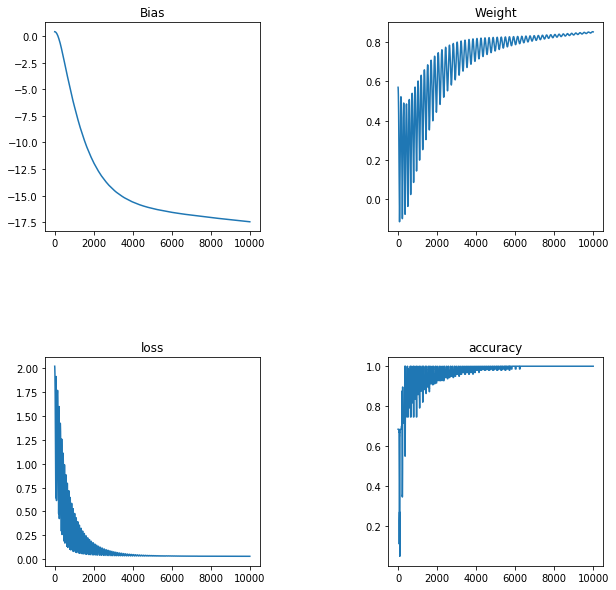

In [52]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.6, wspace=0.6)
fig.set_size_inches(10, 10)
plt.subplot(2, 2, 1)
sns.lineplot(np.arange(0, len(bs)), bs).set_title("Bias")

plt.subplot(2, 2, 2)
sns.lineplot(np.arange(0, len(ws)), ws).set_title("Weight")

# TODO: Add two plots for the Loss and Accuracy, place them in the right positions
plt.subplot(2, 2, 3)
sns.lineplot(np.arange(0, len(losses)), losses).set_title("loss")

plt.subplot(2, 2, 4)
sns.lineplot(np.arange(0, len(accs)), accs).set_title("accuracy")


fig.show()

# what we should see: until the end they stabilize/plateau
# loss needs to reach plateau (otherwise need to continue training)

# Let's do multiple layers

In [0]:
#TODO - Create a network with 3 Layers for each use sigmoid as activation:
#L1 - 4 Neurons
#L2 - 3 Neurons
#L3 - 1 Neuron

#Add sigmod as the activation function
import torch.optim as optim
class Net(nn.Module):
    def __init__(self):
      super(Net, self).__init__()
      self.fc1 = nn.Linear(1, 4) #1 layer with 1 input (1 variable: temperature), 4 outputs (4 neurons)
      self.fc2 = nn.Linear(4, 3) #1 layer with 4 inputs, 3 outputs
      self.fc3 = nn.Linear(3, 1) # 3 inputs, 1 output (only 1 prediction)
      
    def forward(self, x):
      x1 = torch.sigmoid(self.fc1(x)) # linear layer receives as input x
      x2 = torch.sigmoid(self.fc2(x1))
      x3 = torch.sigmoid(self.fc3(x2))
      
      return x3


In [0]:
net = Net()
criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.999)

In [59]:
print(net.fc2.weight)

Parameter containing:
tensor([[-0.1331, -0.4726,  0.4321,  0.4257],
        [ 0.3276, -0.2324,  0.3623,  0.1869],
        [-0.3172, -0.1585, -0.2050,  0.3434]], requires_grad=True)


In [60]:
net.to(device)
x_train = x_train.to(device)
y_train = y_train.to(device)
net.train()
losses = []
accs = []
ws = []
bs = []
for epoch in range(10000):  # do 200 epoch 
  # zero the gradients
  optimizer.zero_grad()

  # Forward 
  outputs = net(x_train)
  # Calculate error
  loss = criterion(outputs, y_train)
  # Backward
  loss.backward()
  # Optimize/Update parameters
  optimizer.step()
  
  # Track the changes - This is normally done using tensorboard or similar
  losses.append(loss.item())
  accs.append(sklearn.metrics.accuracy_score([1 if x > 0.5 else 0 for x in outputs.cpu().detach().numpy()], y_train.cpu().numpy()))
  ws.append(net.fc1.weight.cpu().detach().numpy()[0][0])
  bs.append(net.fc1.bias.cpu().detach().numpy()[0])

  # print statistics
  if epoch % 500 == 0:
      acc = sklearn.metrics.accuracy_score([1 if x > 0.5 else 0 for x in outputs.cpu().detach().numpy()], y_train.cpu().numpy())
      print("Epoch: {:4} Loss: {:.5} Acc: {:.3}".format(epoch, loss.item(), acc))

print('Finished Training')

Epoch:    0 Loss: 0.67924 Acc: 0.746
Epoch:  500 Loss: 0.58207 Acc: 0.746
Epoch: 1000 Loss: 0.45402 Acc: 0.746
Epoch: 1500 Loss: 0.38824 Acc: 0.746
Epoch: 2000 Loss: 0.37114 Acc: 0.746
Epoch: 2500 Loss: 0.30836 Acc: 0.807
Epoch: 3000 Loss: 0.26067 Acc: 0.884
Epoch: 3500 Loss: 0.16163 Acc: 0.95
Epoch: 4000 Loss: 0.10286 Acc: 0.96
Epoch: 4500 Loss: 0.077721 Acc: 0.969
Epoch: 5000 Loss: 0.052744 Acc: 0.986
Epoch: 5500 Loss: 0.040761 Acc: 0.98
Epoch: 6000 Loss: 0.032503 Acc: 0.986
Epoch: 6500 Loss: 0.028086 Acc: 0.986
Epoch: 7000 Loss: 0.023849 Acc: 1.0
Epoch: 7500 Loss: 0.020331 Acc: 1.0
Epoch: 8000 Loss: 0.018931 Acc: 1.0
Epoch: 8500 Loss: 0.017162 Acc: 1.0
Epoch: 9000 Loss: 0.016192 Acc: 1.0
Epoch: 9500 Loss: 0.015299 Acc: 1.0
Finished Training


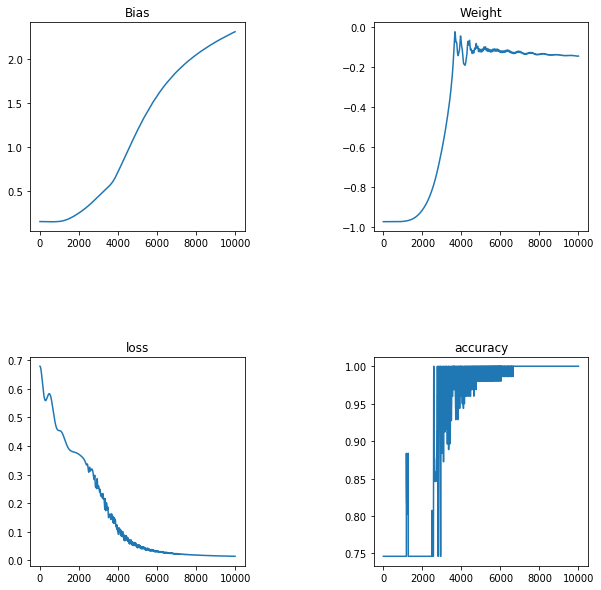

In [61]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.6, wspace=0.6)
fig.set_size_inches(10, 10)
plt.subplot(2, 2, 1)
sns.lineplot(np.arange(0, len(bs)), bs).set_title("Bias")

plt.subplot(2, 2, 2)
sns.lineplot(np.arange(0, len(ws)), ws).set_title("Weight")

plt.subplot(2, 2, 3)
sns.lineplot(np.arange(0, len(losses)), losses).set_title("loss")

plt.subplot(2, 2, 4)
sns.lineplot(np.arange(0, len(accs)), accs).set_title("accuracy")


fig.show()